# Credit Card Fraud Detector using Imbalaced Dataset Handling

In [43]:
# Imported Libraries
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [44]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [45]:
df.shape

(284807, 31)

In [46]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [47]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [48]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [49]:
fraud = df[df.Class==1].Class
notFraud = df[df.Class==0].Class

print(len(fraud), len(notFraud))

492 284315


## Undersampling

In [50]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [51]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

In [52]:
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [53]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


## Splitting the Data

In [54]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis='columns')
y = df.Class

In [55]:
skf = StratifiedKFold(n_splits=5,shuffle=False,random_state=None)
for train_index, test_index in skf.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

## Random Sub/Under-Sampling

In [56]:
# Shuffling the entire dataset (frac=1 means 100% of the data)
df = df.sample(frac=1)

fraud_df = df.loc[df['Class']==1]
non_fraud_df = df.loc[df['Class']==0][:492]

new_df = pd.concat([fraud_df,non_fraud_df])

# Shuffling the entire dataset again
new_df = new_df.sample(frac=1)

In [57]:
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
234633,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,-3.202436,...,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,1,-0.285195,0.744381
245468,1.698010,-0.979685,-0.760764,0.569672,-0.575781,0.075147,-0.504452,0.059699,1.256494,0.001392,...,0.702461,-0.021285,0.457090,-0.218111,0.434748,-0.048395,-0.016046,0,2.094599,0.799704
125264,1.144454,-0.808754,-0.502001,-0.961279,1.233366,3.819935,-1.183742,1.024941,0.951539,-0.359326,...,-0.486324,-0.033605,1.083040,0.247394,0.998441,-0.044250,0.021156,0,0.739887,-0.083377
193530,-1.087393,1.261001,-0.406687,-0.515026,-0.849203,1.040441,-2.320114,-1.299492,0.257569,-1.735477,...,1.283547,0.437994,0.121549,-1.338896,0.299280,-0.239344,0.021497,0,-0.044715,0.534323
174225,2.065192,0.005944,-1.620513,0.013658,0.640890,-0.249733,0.153834,-0.175094,0.176103,0.134275,...,0.966943,-0.040801,0.288874,0.342664,-0.132788,-0.018169,-0.064405,0,-0.282401,0.436283


In [58]:
fraud = new_df[new_df.Class==1].Class
notFraud = new_df[new_df.Class==0].Class

print(len(fraud), len(notFraud))

492 492


## EDA

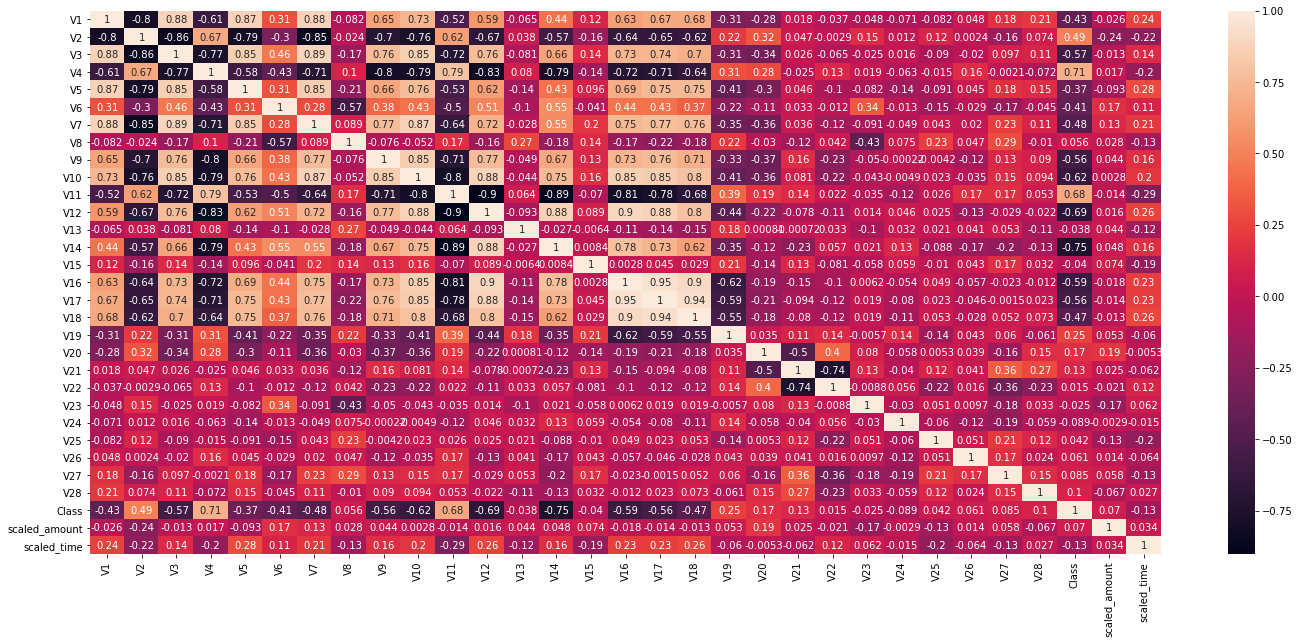

In [59]:
# Correlation Matrix
fig, ax = plt.subplots(figsize=(24,10))
data = new_df.corr()
ax = sns.heatmap(data,annot=True)


In [60]:
# Negative Correlations (The lower our feature value the more likely it will be a fraud transaction): 
#V16, V14, V12 and V10 

# Positive Correlations (The higher the feature the probability increases that it will be a fraud transaction): 
# V2, V4, V11, and V19

Text(0.5, 1.0, 'V10 vs Class Negative Correlation')

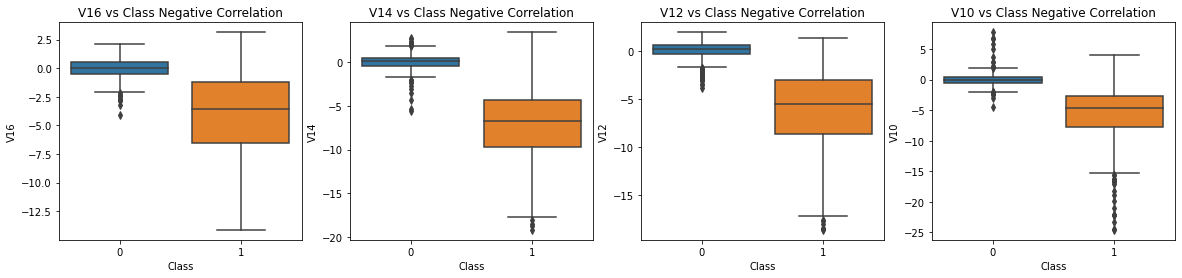

In [61]:
fig, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x='Class',y='V16',data=new_df,ax=axes[0])
axes[0].set_title('V16 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V14',data=new_df,ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V12',data=new_df,ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V10',data=new_df,ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

Text(0.5, 1.0, 'V19 vs Class Positive Correlation')

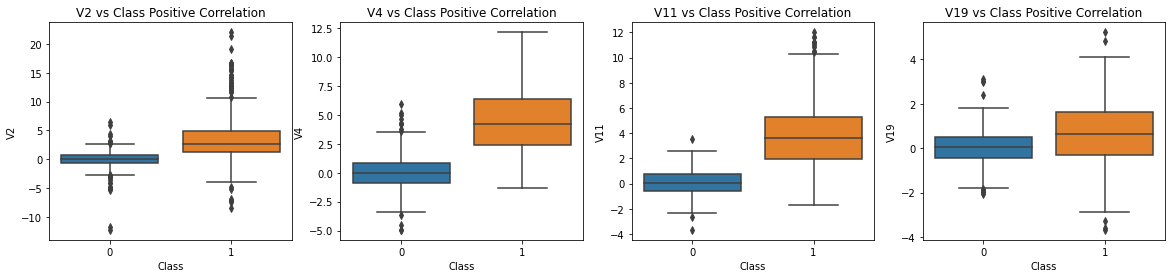

In [62]:
fig, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x='Class',y='V2',data=new_df,ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x='Class',y='V4',data=new_df,ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x='Class',y='V11',data=new_df,ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x='Class',y='V19',data=new_df,ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

## Dimensionality Reduction

In [63]:
# t-SNE
X = new_df.drop('Class', axis='columns')
y = new_df.Class

X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

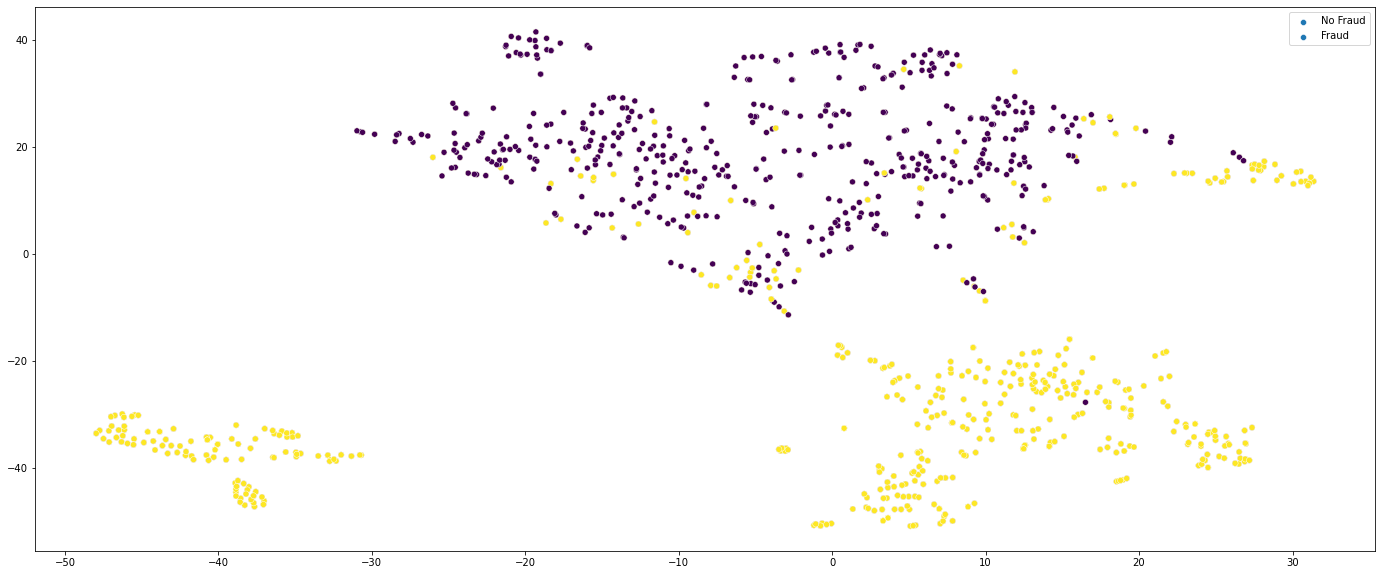

In [64]:
fig, ax = plt.subplots(figsize=(24,10))

ax = sns.scatterplot(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0),  label='No Fraud', linewidths=2)
ax = sns.scatterplot(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1),  label='Fraud', linewidths=2)
# ax = plt.set_title('t-SNE', fontsize=14)


In [65]:
# the dataset is already reduced dimensionally and are represented
# using the variables V1-V28, there is no need to reduce them further

In [66]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
type(X_train)

pandas.core.frame.DataFrame

In [69]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [70]:
type(X_train)

numpy.ndarray

## Training our model using classifiers

In [71]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [72]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    training_score = cross_val_score(classifier,X_train,y_train,cv=5)
    print(classifier, 100*(training_score.mean()))

LogisticRegression() 93.01136821736677
KNeighborsClassifier() 92.24623075062486
SVC() 92.50100782068856
DecisionTreeClassifier() 88.31008626945093


In [73]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train,y_train)
log_reg = grid_log_reg.best_estimator_

# KNN
knn_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params)
grid_knn.fit(X_train,y_train)
knn = grid_knn.best_estimator_

# SVM
svm_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svm = GridSearchCV(SVC(),svm_params)
grid_svm.fit(X_train,y_train)
svm = grid_svm.best_estimator_

# Decision Tree
dt_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
             "min_samples_leaf": list(range(5,7,1))}
grid_dt = GridSearchCV(DecisionTreeClassifier(),dt_params)
grid_dt.fit(X_train,y_train)
dt = grid_dt.best_estimator_

In [74]:
lr_score = cross_val_score(log_reg,X_train,y_train,cv=5)
print(log_reg,lr_score.mean())
knn_score = cross_val_score(knn,X_train,y_train,cv=5)
print(knn,knn_score.mean())
svm_score = cross_val_score(svm,X_train,y_train,cv=5)
print(svm,svm_score.mean())
dt_score = cross_val_score(dt,X_train,y_train,cv=5)
print(dt,dt_score.mean())

LogisticRegression(C=1000) 0.9339353382246232
KNeighborsClassifier(n_neighbors=2) 0.9250503910344271
SVC(C=0.7, kernel='linear') 0.9364669837942433
DecisionTreeClassifier(max_depth=2, min_samples_leaf=5) 0.9123357252277675


## ROC Curve

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")
knn_pred = cross_val_predict(knn, X_train, y_train, cv=5)
svm_pred = cross_val_predict(svm, X_train, y_train, cv=5, method="decision_function")
dt_pred = cross_val_predict(dt, X_train, y_train, cv=5)

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knn_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svm_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, dt_pred))

Logistic Regression:  0.9682890283913302
KNears Neighbors:  0.9247138908264227
Support Vector Classifier:  0.9687475780826164
Decision Tree Classifier:  0.9121360665478313


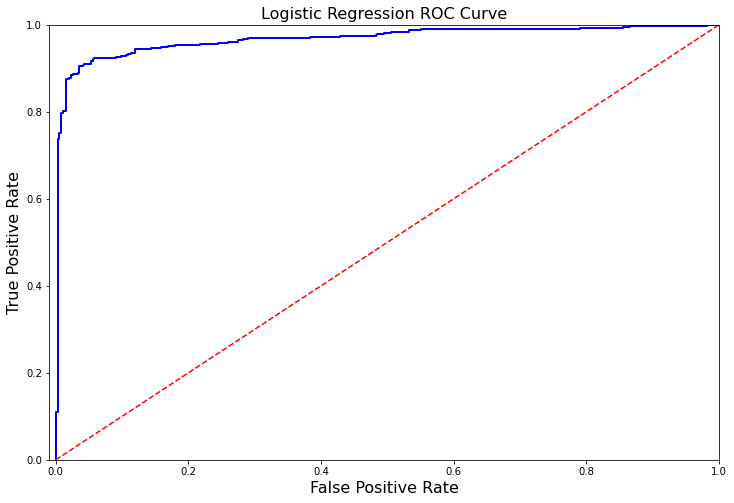

In [76]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

## SMOTE (Synthetic Minority Over-sampling Technique)
original dataset -> cross validation -> oversampling

In [77]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [78]:
# List to append the score and then find the average
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

In [79]:
lr_sm = LogisticRegression()

In [83]:
lr_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_lr = LogisticRegression()#RandomizedSearchCV(LogisticRegression(), lr_params, n_iter=4)

for train, test in skf.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_lr) # SMOTE happens during Cross Validation not before
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
#     best_est = rand_lr.best_estimator_
    prediction = rand_lr.predict(original_Xtrain[test])

In [84]:
accuracy_list.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
precision_list.append(precision_score(original_ytrain[test], prediction))
recall_list.append(recall_score(original_ytrain[test], prediction))
f1_list.append(f1_score(original_ytrain[test], prediction))
auc_list.append(roc_auc_score(original_ytrain[test], prediction))

In [88]:
print("accuracy: {}".format(np.mean(accuracy_list)))
print("precision: {}".format(np.mean(precision_list)))
print("recall: {}".format(np.mean(recall_list)))
print("f1: {}".format(np.mean(f1_list)))

accuracy: 0.9831903267572253
precision: 0.08464328899637243
recall: 0.8860759493670886
f1: 0.15452538631346577


In [91]:
labels = ['No Fraud', 'Fraud']
smote_prediction = rand_lr.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.86      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.92      0.60     56961
weighted avg       1.00      0.99      0.99     56961



In [93]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=42)

Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [99]:
lr_sm = grid_log_reg.best_estimator_
lr_sm.fit(Xsm_train, ysm_train)

LogisticRegression(C=1000)

In [101]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

AttributeError: module 'tensorflow.compat.v2.__internal__.tracking' has no attribute 'no_automatic_dependency_tracking'